In [21]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [54]:
#load and inspect the data
data_set = pd.read_csv("fish.csv")
data_set[:3]

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1


In [55]:
data_set.keys()

Index(['species', 'weight', 'length1', 'length2', 'length3', 'height',
       'width'],
      dtype='object')

In [56]:
data_set['species']

0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
      ...  
80     Pike
81     Pike
82     Pike
83     Pike
84     Pike
Name: species, Length: 85, dtype: object

In [57]:
data_set['species_name'] = data_set['species'].map({'Bream':0, 'Roach':1, 'Smelt':2, 'Pike':3})

In [58]:
data_set.keys()

Index(['species', 'weight', 'length1', 'length2', 'length3', 'height', 'width',
       'species_name'],
      dtype='object')

In [67]:
#Extracting Independent and dependent Variable  
x = data_set.iloc[:, [1, 6]].values  
y = data_set.iloc[:, 7].values  

In [65]:
x[:3]

array([[242. ,  38.4],
       [290. ,  40. ],
       [340. ,  39.8]])

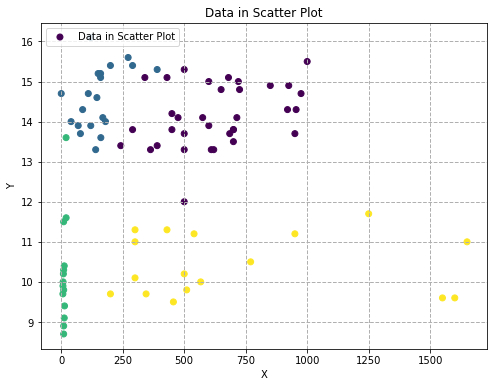

In [68]:
# plot the data (scatter)
plt.figure(figsize =(8, 6))
plt.scatter(x[:,0] ,x[:,1], c = y, label = 'Data in Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data in Scatter Plot')
plt.legend(loc ='upper left')
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()

In [69]:
y.shape

(85,)

In [70]:
x[:3]

array([[242. ,  13.4],
       [290. ,  13.8],
       [340. ,  15.1]])

In [71]:
y[:3]

array([0, 0, 0], dtype=int64)

In [72]:
# Splitting the dataset into training and test set.  
 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(68, 2)
(68,)
(17, 2)
(17,)


In [73]:
x_train[:3]

array([[  6.7,   9.7],
       [  9.8,   8.7],
       [456. ,   9.5]])

In [74]:
x_test[:3]

array([[340. ,  15.1],
       [600. ,  13.9],
       [ 12.2,  10.4]])

In [75]:
#feature Scaling  
  
scalar = StandardScaler()    
x_train = scalar.fit_transform(x_train)    
x_test = scalar.transform(x_test)  

In [76]:
x_train[:3]

array([[-1.09406704, -1.40504411],
       [-1.08618071, -1.86022753],
       [ 0.04894162, -1.49608079]])

In [77]:
x_test[:3]

array([[-0.24615966,  1.05294635],
       [ 0.41527424,  0.50672625],
       [-1.08007517, -1.08641572]])

In [83]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

sigmoid(x)[:3]

array([[1.        , 0.99999848],
       [1.        , 0.99999898],
       [1.        , 0.99999972]])

In [78]:
#Fitting Logistic Regression to the training set  
 
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [79]:
#Predicting the test set result  
y_pred = classifier.predict(x_test) 
y_pred 

array([1, 0, 2, 1, 1, 0, 1, 3, 2, 1, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

In [80]:
y_pred.shape

(17,)

In [81]:
y_true = y
y_true.shape

(85,)